In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("ambitionbox_dataset_final.csv")
df.head()

,company_name,rating,designation,type,location,benefits,jobs_count,interviews_count,salary,reviews_count
0,Atlassian,3.1,Data Scientist,Software Product,Bangalore,4.0,63.0,95.0,3800.0,163.0
1,ABCD,4.0,Data Scientist,Education & Training,Bangalore,12.0,0.0,96.0,4900.0,226.0
2,Facebook,4.4,Data Scientist,Internet,Bangalore,22.0,0.0,55.0,1200.0,168.0
3,Coursera,3.4,Data Scientist,EdTech,Gurgaon,1.0,15.0,10.0,371.0,42.0
4,UBS,3.8,Data Scientist,Financial Services,Pune,117.0,1.0,369.0,31300.0,3400.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      419 non-null    object 
 1   rating            419 non-null    float64
 2   designation       419 non-null    object 
 3   type              401 non-null    object 
 4   location          419 non-null    object 
 5   benefits          419 non-null    float64
 6   jobs_count        419 non-null    float64
 7   interviews_count  419 non-null    float64
 8   salary            419 non-null    float64
 9   reviews_count     419 non-null    float64
dtypes: float64(6), object(4)
memory usage: 32.9+ KB


In [4]:
df["benefits"] = df["benefits"].astype(int)

In [5]:
df["reviews_count"] = df["reviews_count"].astype(int)

In [6]:
df["interviews_count"] = df["interviews_count"].astype(int)

In [7]:
df["jobs_count"] = df["jobs_count"].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      419 non-null    object 
 1   rating            419 non-null    float64
 2   designation       419 non-null    object 
 3   type              401 non-null    object 
 4   location          419 non-null    object 
 5   benefits          419 non-null    int64  
 6   jobs_count        419 non-null    int64  
 7   interviews_count  419 non-null    int64  
 8   salary            419 non-null    float64
 9   reviews_count     419 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 32.9+ KB


In [10]:
### Dividing the dataset accounding to the datatypes
## 1. Numerical ----> rating, benefits, jobs_count, interviews_count, salary, reviews_count
## 2. Categorical --> company_name, designation, type, location

In [8]:
### Central Tendency on Numerical columns
df.describe().round(3)

,rating,benefits,jobs_count,interviews_count,salary,reviews_count
count,419.000,419.000,419.000,419.000,419.000,419.000
mean,3.690,220.160,86.881,277.547,14829.115,2389.484
std,0.406,461.312,196.230,540.304,24384.980,4611.540
min,2.100,0.000,0.000,0.000,56.000,2.000
25%,3.500,23.000,3.000,57.000,2850.000,418.000
50%,3.700,89.000,18.000,138.000,7400.000,973.000
75%,4.000,226.500,78.500,283.500,17200.000,2600.000
max,4.700,4100.000,1500.000,5700.000,250000.000,45000.000


In [9]:
### Insights

## 1. The average "rating" is 3.69 ,  this says most of the ratings are around the mean, and the median or the middle value is 3.7 
##    which is highlighting that most of the ratings are concenrated near mean
## 2. 220.160 is the average benefits that the users are getting but the middle value is 89, this shows that the mean is influenced by big numbers.
## 3. 86.881 is the average jobs available , but the middle value is 18 which shows significance of big numbers.
## 4. 277.54 is the average interviews_count and 138 shows the true picture.
## 5. 14800 is the average salary but the middle valu is 7400, which is very least and the most of the big salary value is effecting the mean.
## 6. 2389 is the average reviews count , middle value is 973.

#### Univarient

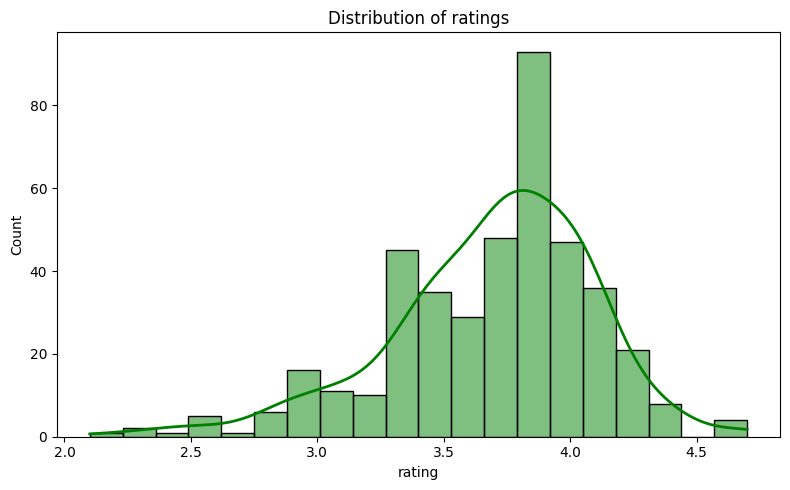

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df["rating"],kde=True,color="green",line_kws={"color":"lightgreen","linewidth":2})
plt.title("Distribution of ratings")
plt.tight_layout()
plt.show()

In [14]:
df["rating"].skew()

np.float64(-0.7872847083921346)

In [15]:
# the distribution is slightly in bell column shaped , peaks can be seen between the range 3.25-4.25.
# the distribution shows slightly leaning to left-side , and skewness of -0.78 is justifying it that the ratings is "leftskewed".
# the distribution is left skewed because most of the ratings given by the users are high.
# very less distribution is visible at the range of 2-3.0

In [37]:
## benefits columns has outliers.
q1 = df["benefits"].quantile(0.25)
q3 = df["benefits"].quantile(0.75)
iqr = q3-q1
lower_threshold = q1-(1.5*iqr)
higher_threshold = q3+(1.5*iqr)

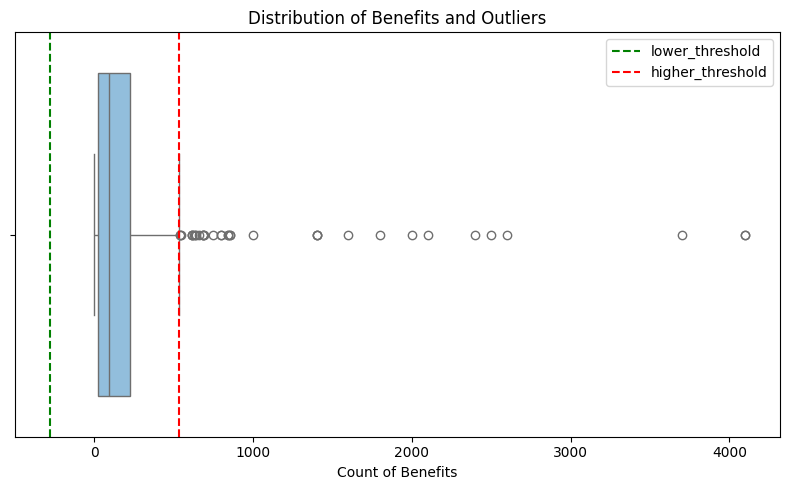

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["benefits"],color="#85C1E9")
plt.axvline(lower_threshold,color="green",linestyle="--",label="lower_threshold")
plt.axvline(higher_threshold,color="red",linestyle="--",label="higher_threshold")
plt.xlabel("Count of Benefits")
plt.title("Distribution of Benefits and Outliers")
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
print(len(df[df["benefits"]>higher_threshold]),len(df[df["benefits"]<lower_threshold]))

35 0


In [10]:
# Boxplot shows the outliers in benefits column
# the no of outliers are 35
# these outliers shows that some companies are give more benefits than the remaining.
# the outliers are high benefits given by the companies, we are not performing changes on outliers, because some comes gives more benefits.

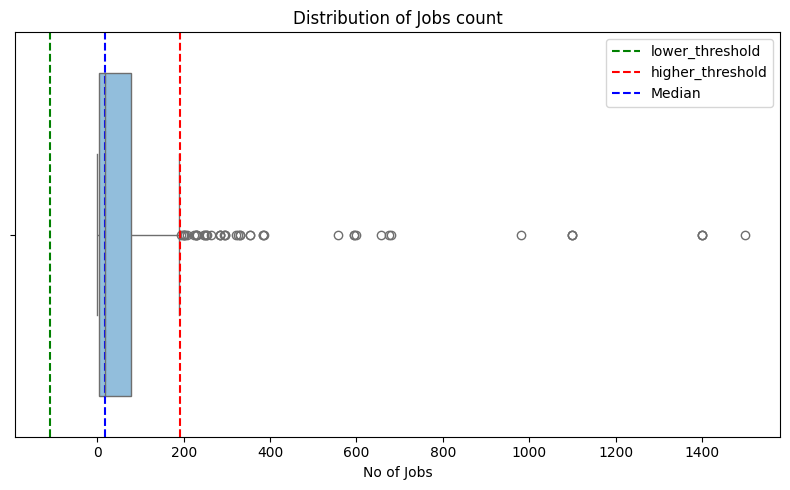

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["jobs_count"],color="#85C1E9")
plt.axvline(lower_threshold,color="green",linestyle="--",label="lower_threshold")
plt.axvline(higher_threshold,color="red",linestyle="--",label="higher_threshold")
plt.axvline(df["jobs_count"].median(),color="blue",linestyle="--",label="Median")
plt.title("Distribution of Jobs count")
plt.xlabel("No of Jobs")
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
q1 = df["jobs_count"].quantile(0.25)
q3 = df["jobs_count"].quantile(0.75)
iqr = q3-q1
lower_threshold = q1-(1.5*iqr)
higher_threshold = q3+(1.5*iqr)

In [41]:
print(len(df[df["jobs_count"]>higher_threshold]),len(df[df["jobs_count"]<lower_threshold]))

47 0


In [11]:
# Box plot shows the presence of outlier which are tailing to 1400,
# the median of the jobs_count is 18
# the total outliers are 47, which are higher than the q3. 
# this shows some comesa are having large opening.


In [43]:
higher_jobs_count = df[df["jobs_count"]>higher_threshold]
higher_jobs_count.head()

,company_name,rating,designation,type,location,benefits,jobs_count,interviews_count,salary,reviews_count
30,ExxonMobil,3.8,Data Scientist,Oil & Gas,Bangalore,57,386,80,3800.0,521
32,Info Edge,3.9,Data Scientist,Internet,Noida,299,294,373,10900.0,2300
33,Google,4.4,Data Scientist,Software Product,Bangalore,132,600,993,30800.0,1900
40,PepsiCo,4.0,Data Scientist,Food Processing,Hyderabad,244,295,233,13200.0,3100
41,Amazon,3.9,Data Scientist,Internet,Bangalore,4100,1400,5700,150000.0,30600


In [44]:
higher_jobs_count["designation"].value_counts()

designation
Data Scientist    17
Data Engineer     17
Data Analyst      13
Name: count, dtype: int64

In [26]:
## the more jobs avaliable are "Data Scientist", "Data Engineer", "Data Analyst"

In [45]:
higher_jobs_count["company_name"].value_counts().head()

company_name
Google           3
Apple            3
Deutsche Bank    3
SAP              3
Goldman Sachs    3
Name: count, dtype: int64

In [28]:
## these are the top 5 companies with more jobs openings than the rest of the companies

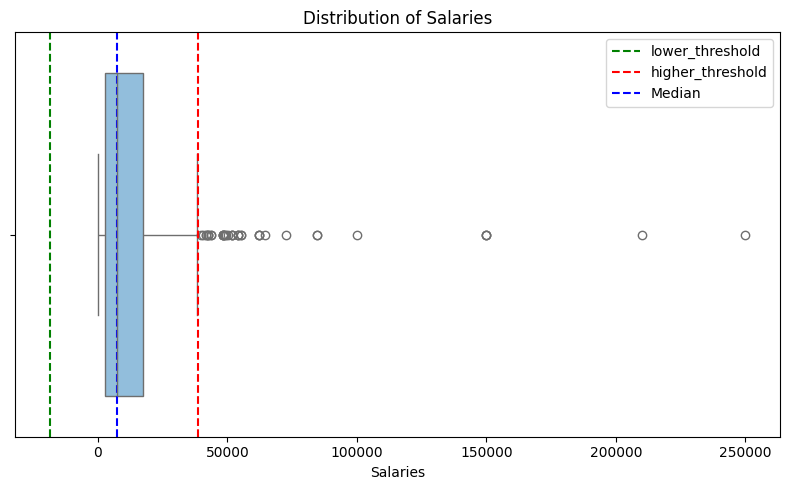

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["salary"],color="#85C1E9")
plt.axvline(lower_threshold,color="green",linestyle="--",label="lower_threshold")
plt.axvline(higher_threshold,color="red",linestyle="--",label="higher_threshold")
plt.axvline(df["salary"].median(),color="blue",linestyle="--",label="Median")
plt.title("Distribution of Salaries")
plt.xlabel("Salaries")
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
q1 = df["salary"].quantile(0.25)
q3 = df["salary"].quantile(0.75)
iqr = q3-q1
lower_threshold = q1-(1.5*iqr)
higher_threshold = q3+(1.5*iqr)

In [47]:
print(len(df[df["salary"]>higher_threshold]),len(df[df["salary"]<lower_threshold]))

38 0


In [49]:
higher_salaries = df[df["salary"]>higher_threshold]
higher_salaries.head()

,company_name,rating,designation,type,location,benefits,jobs_count,interviews_count,salary,reviews_count
24,Flipkart,3.9,Data Scientist,Internet,Bangalore,1400,164,1600,54100.0,12600
38,Optum Global Solutions,4.0,Data Scientist,IT Services & Consulting,Hyderabad,686,60,746,48400.0,7700
41,Amazon,3.9,Data Scientist,Internet,Bangalore,4100,1400,5700,150000.0,30600
43,IDFC FIRST Bank,3.9,Data Scientist,Banking,Mumbai,692,32,891,49300.0,13900
46,Citicorp,3.7,Data Scientist,Financial Services,Pune,517,0,616,51800.0,5400


In [50]:
higher_salaries["designation"].value_counts()

designation
Data Scientist    18
Data Analyst      10
Data Engineer     10
Name: count, dtype: int64

In [51]:
# data Scientist role is getting high salaries

In [52]:
higher_salaries.company_name.value_counts().head()

company_name
Flipkart                  3
Optum Global Solutions    3
Citicorp                  3
Amazon                    2
JPMorgan Chase & Co.      2
Name: count, dtype: int64

In [54]:
# these companies are offering the higher salaries

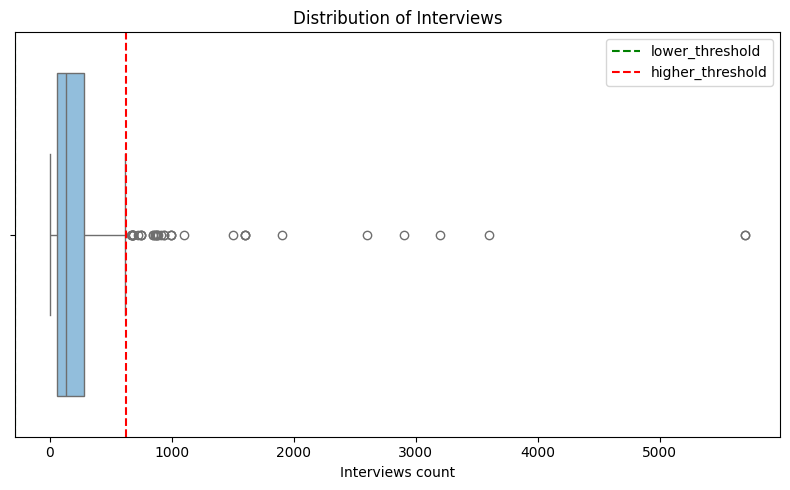

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df["interviews_count"],color="#85C1E9")
plt.axvline(lower_threshold,color="green",linestyle="--",label="lower_threshold")
plt.axvline(higher_threshold,color="red",linestyle="--",label="higher_threshold")
plt.title("Distribution of Interviews")
plt.xlabel("Interviews count")
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
q1 = df["interviews_count"].quantile(0.25)
q3 = df["interviews_count"].quantile(0.75)
iqr = q3-q1
lower_threshold = q1-(1.5*iqr)
higher_threshold = q3+(1.5*iqr)

In [61]:
print(len(df[df["interviews_count"]>higher_threshold]),len(df[df["interviews_count"]<lower_threshold]))

38 0


In [13]:
# high number of interviews are treated as outliers.
# Generally no of interviews can be vary from company to conpany
# SOME companies conduct more interview rounds, according to there need 


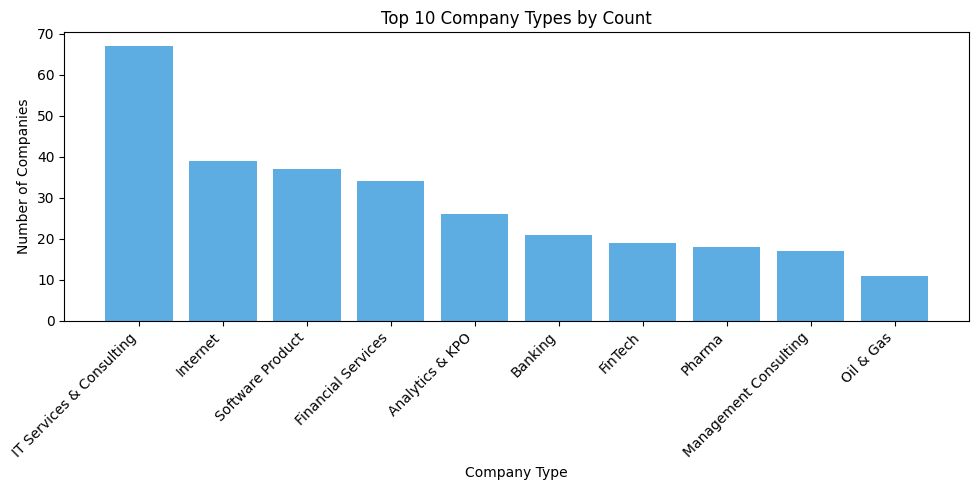

In [68]:
plt.figure(figsize=(10,5))
counts = df["type"].value_counts().head(10)
plt.bar(counts.index, counts.values, color="#5DADE2")
plt.ylabel("Number of Companies")
plt.xlabel("Company Type")
plt.title("Top 10 Company Types by Count")
plt.xticks(rotation=45, ha="right")
# for i, v in enumerate(counts.values):
#     plt.text(i, v + 1, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [14]:
# these are the top 10 companies types in ambition box
# IT type companies are more and highest among other companies.
# almost ~70 companies comes under IT


In [69]:
df["designation"].value_counts()

designation
Data Scientist    140
Data Engineer     140
Data Analyst      139
Name: count, dtype: int64

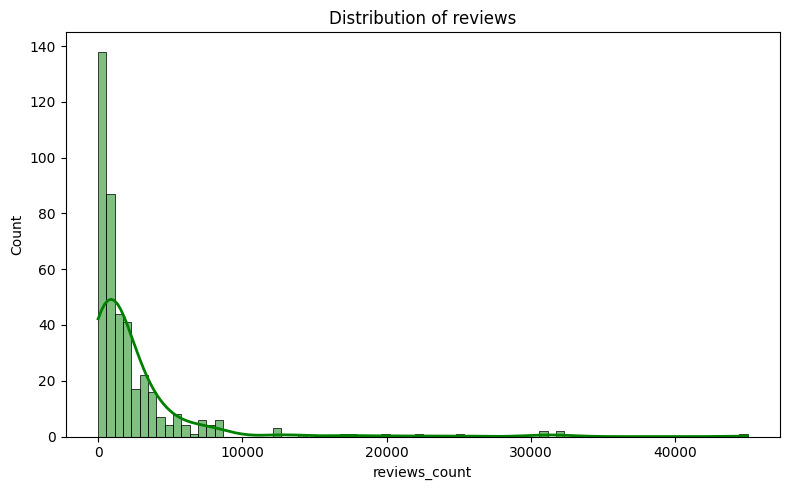

In [70]:
plt.figure(figsize=(8,5))
sns.histplot(df["reviews_count"],kde=True,color="green",line_kws={"color":"lightgreen","linewidth":2})
plt.title("Distribution of reviews")
plt.tight_layout()
plt.show()

In [15]:
# the reviews count is peak at intially and the tail is extended till 40000 - 50000
# 0 - 10,000 are the general count of reviews given by the users.
#  above 10,000 are mostly big companies because of large number of people work.

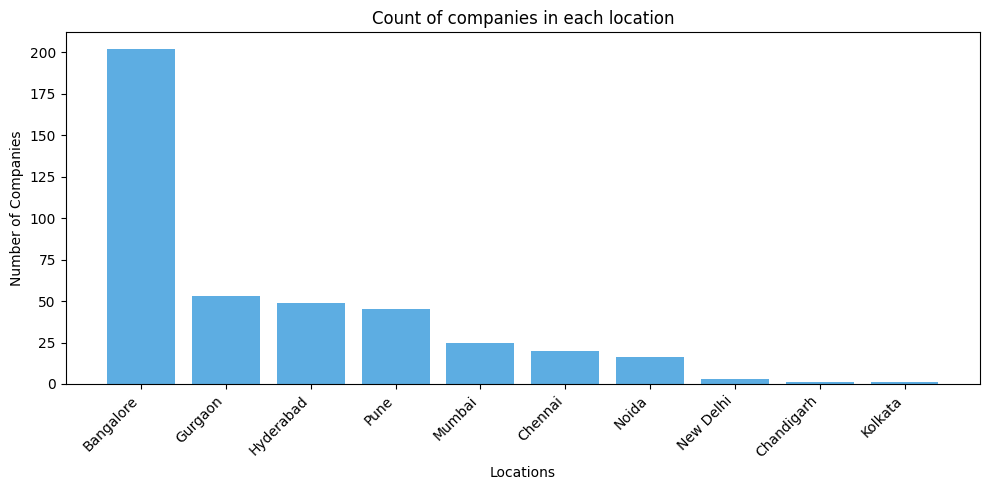

In [32]:
plt.figure(figsize=(10,5))
counts = df["location"].value_counts().head(10)
plt.bar(counts.index, counts.values, color="#5DADE2")
plt.ylabel("Number of Companies")
plt.xlabel("Locations")
plt.title("Count of companies in each location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [21]:
# bangalore has highest no of companies
# 2nd highest is gurgaon, which is having a huge difference compared to bangalore

#### Bivarient 

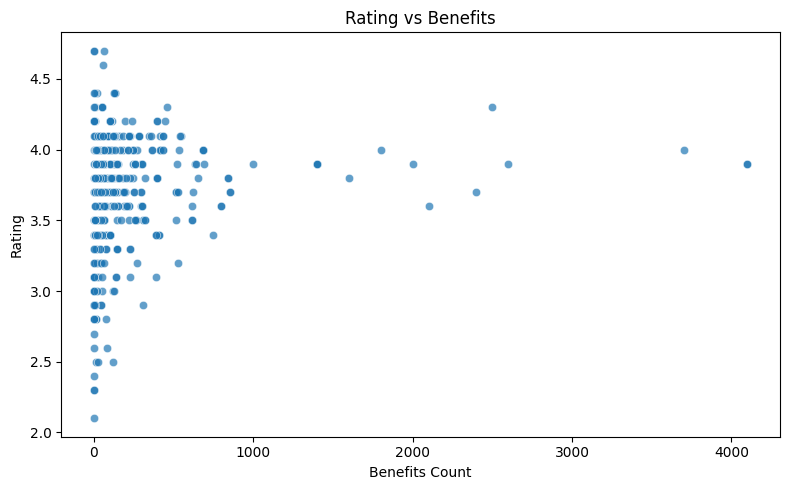

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(df,x="benefits",y="rating",alpha=0.7)
plt.xlabel("Benefits Count")
plt.ylabel("Rating")
plt.title("Rating vs Benefits")
plt.tight_layout()
plt.show()

In [14]:
# The data is heavily Skewed to the right, it shows more points cluster between the range 0-1000 benefit counts.
# most points are falling in the range of 3.4 to 4.25 , but too many overlaps and it is not giving proper relation.
# There is no strong linear relationship between benefits count and ratings. Ratings remain relatively stable across benefit levels, 
# suggesting that offering more benefits alone does not guarantee higher employee ratings.

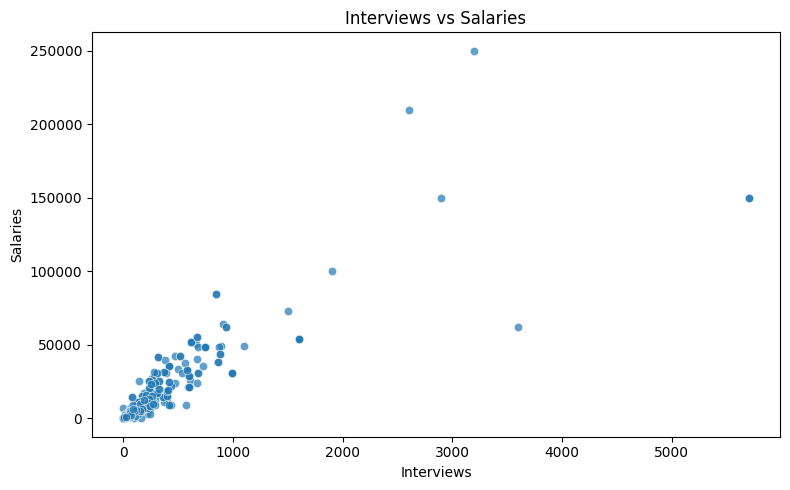

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(df,x="interviews_count",y="salary",alpha=0.7)
plt.xlabel("Interviews")
plt.ylabel("Salaries")
plt.title("Interviews vs Salaries")
plt.tight_layout()
plt.show()

In [22]:
# most points are clustered near 0 - 1000 interviews.
# there is no linear relation is established between the salaries and interviews.
# but it is quite saying that more interview count ,higher salary.
# but we can also say that there is no proper strong evidence that interview and salary are related


In [18]:
df.columns

Index(['company_name', 'rating', 'designation', 'type', 'location', 'benefits',
       'jobs_count', 'interviews_count', 'salary', 'reviews_count'],
      dtype='object')

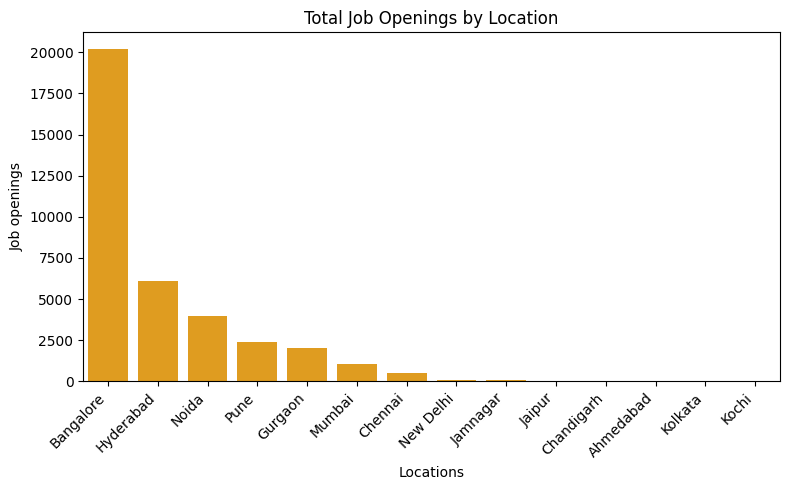

In [30]:
jobs_location = (df.groupby("location")["jobs_count"].sum().sort_values(ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x=jobs_location.index,y=jobs_location.values,color="orange")
plt.xlabel("Locations")
plt.xticks(rotation=45,ha="right")
plt.ylabel("Job openings")
plt.title("Total Job Openings by Location")
plt.tight_layout()
plt.show()


In [23]:
# bangalore has highest job counts.
# followed by Hyderabad. 
# gap btw 1st and 2nd is evident and more.

In [31]:
top_locations = jobs_location.head(6)
others = jobs_location.iloc[6:].sum()


In [33]:
pie_locations = pd.concat([top_locations,pd.Series({"Other":others})])

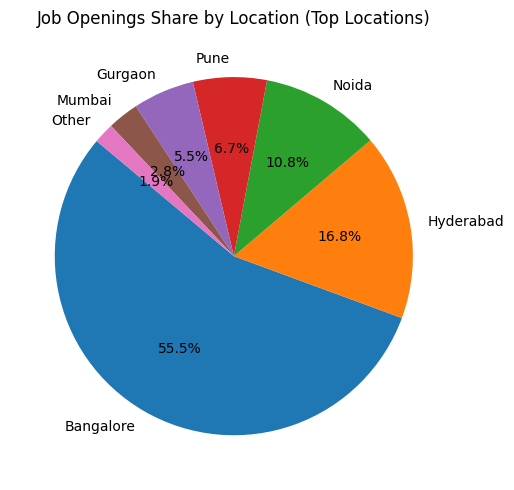

In [35]:
plt.figure(figsize=(10,5))
plt.pie(x=pie_locations.values,labels=pie_locations.index,autopct="%1.1f%%",startangle=140)
plt.title("Job Openings Share by Location (Top Locations)")
plt.tight_layout()
plt.show()

In [24]:
# bangalore occuping 55% of share and hyderabad being the 2nd with 16.8 % share
# other having 1.9% of share

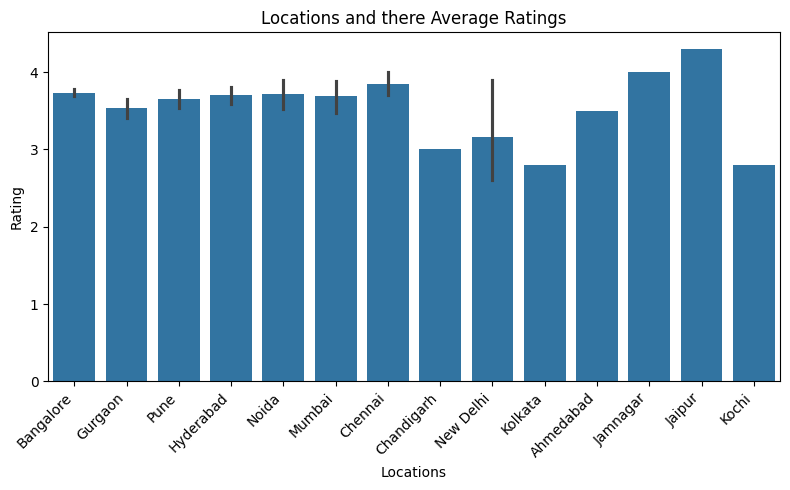

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data = df,x="location",y="rating",estimator='mean')
plt.xlabel("Locations")
plt.xticks(rotation=45,ha="right")
plt.ylabel("Rating")
plt.title("Locations and there Average Ratings")
plt.tight_layout()
plt.show()

In [45]:
# Ratings across locations are mostly clustered between ~3.4 and ~3.9
# No location is extremely bad or extremely good
# This suggests employee satisfaction is fairly consistent across cities

# Some locations (one or two on the right side of the plot) have average ratings around ~4.0–4.3
# Their confidence intervals are relatively narrow

In [9]:
df.columns

Index(['company_name', 'rating', 'designation', 'type', 'location', 'benefits',
       'jobs_count', 'interviews_count', 'salary', 'reviews_count'],
      dtype='object')

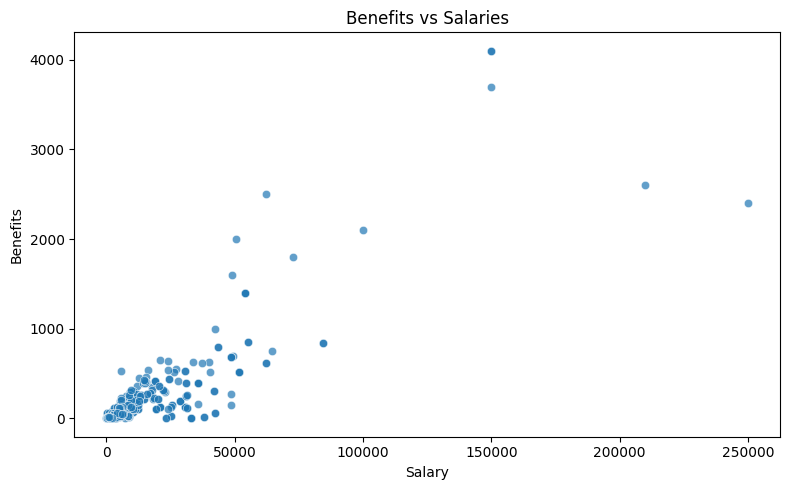

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(df,x="salary",y="benefits",alpha=0.7)
plt.xlabel("Salary")
plt.ylabel("Benefits")
plt.title("Benefits vs Salaries")
plt.tight_layout()
plt.show()

In [11]:
## The scatter plot shows the cluster at the bottom corner.
# the plot shows a weak positive relationship between salary and Benefits
## As the salary increases , Benefits are increasing
# but this doesnt suggest strong relation. 
# some higher salary amounts doesnt have any benefits.

In [8]:
jobs_company = (df.groupby("company_name")["jobs_count"].sum().sort_values(ascending=False).head(10))

In [21]:
jobs_company

company_name
Amazon                  2900
EXL Service             2800
Oracle                  2200
Google                  1788
JPMorgan Chase & Co.    1336
Deloitte                1100
Deutsche Bank            985
Amgen                    981
Apple                    852
MasterCard               766
Name: jobs_count, dtype: int64

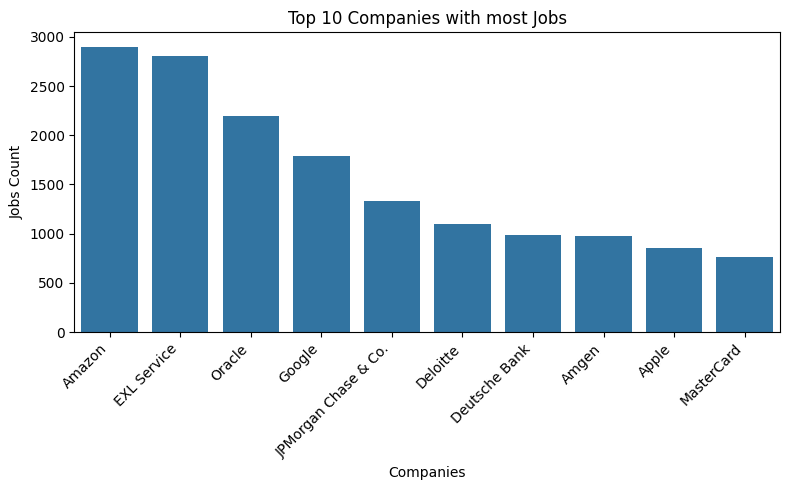

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=jobs_company.index,y=jobs_company.values)
plt.xlabel("Companies")
plt.xticks(rotation=45,ha="right")
plt.ylabel("Jobs Count")
plt.title("Top 10 Companies with most Jobs")
plt.tight_layout()
plt.show()

In [ ]:
# Amazon has the highest jobs count and EXL service is the 2nd .


In [19]:
df.groupby("company_name")[["jobs_count","benefits"]].sum().sort_values(by="jobs_count",ascending=False).head(10)

,jobs_count,benefits
company_name,,
Amazon,2900,8200
EXL Service,2800,1598
Oracle,2200,1234
Google,1788,396
JPMorgan Chase & Co.,1336,1688
Deloitte,1100,2400
Deutsche Bank,985,1197
Amgen,981,3
Apple,852,153


In [21]:
interviews_company = (df.groupby("company_name")["interviews_count"].sum().sort_values(ascending=False).head(10))

In [22]:
interviews_company

company_name
Amazon                    11400
Flipkart                   4800
Jio                        3600
Deloitte                   3200
Google                     2979
ICICI Bank                 2900
IBM                        2600
Optum Global Solutions     2238
Axis Bank                  1900
Oracle                     1882
Name: interviews_count, dtype: int64

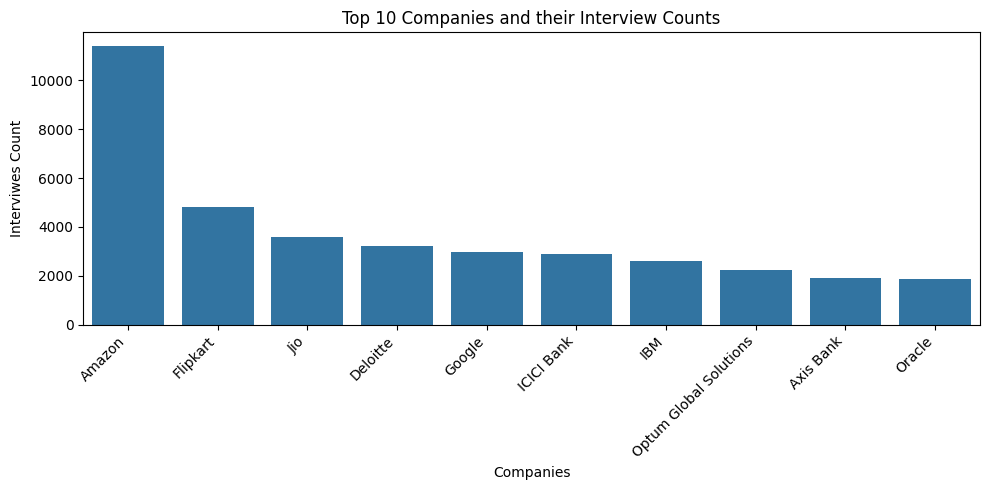

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=interviews_company.index,y=interviews_company.values)
plt.xlabel("Companies")
plt.xticks(rotation=45,ha="right")
plt.ylabel("Interviwes Count")
plt.title("Top 10 Companies and their Interview Counts")
plt.tight_layout()
plt.show()

In [25]:
# Amazon having highest job openings and highest interview count\
# flipkart is the 2nd company.

In [25]:
ratings_designation = (df.groupby("designation")["rating"].mean().sort_values(ascending=False).head(10))

In [26]:
ratings_designation

designation
Data Scientist    3.775714
Data Engineer     3.699286
Data Analyst      3.595683
Name: rating, dtype: float64

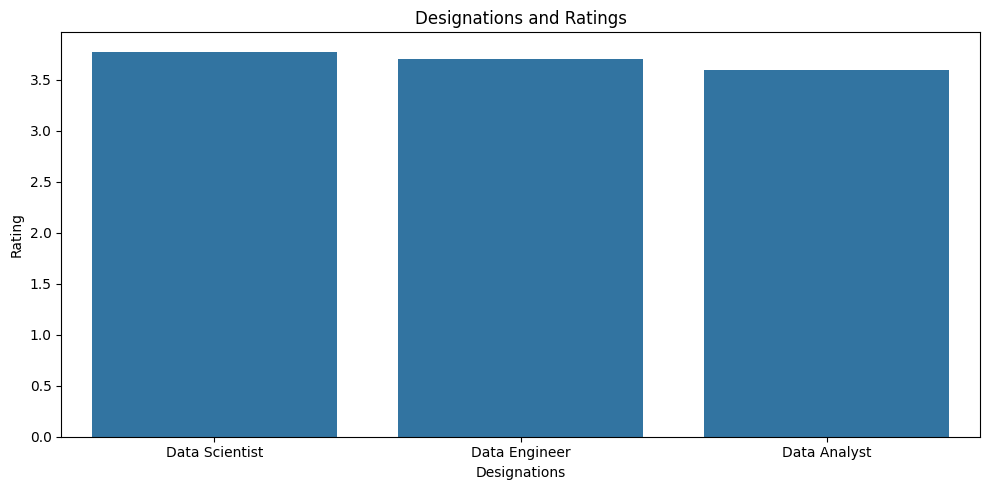

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=ratings_designation.index,y=ratings_designation.values)
plt.xlabel("Designations")
plt.ylabel("Rating")
plt.title("Designations and Ratings")
plt.tight_layout()
plt.show()

#### Multi varient

In [24]:
df.columns

Index(['company_name', 'rating', 'designation', 'type', 'location', 'benefits',
       'jobs_count', 'interviews_count', 'salary', 'reviews_count'],
      dtype='object')

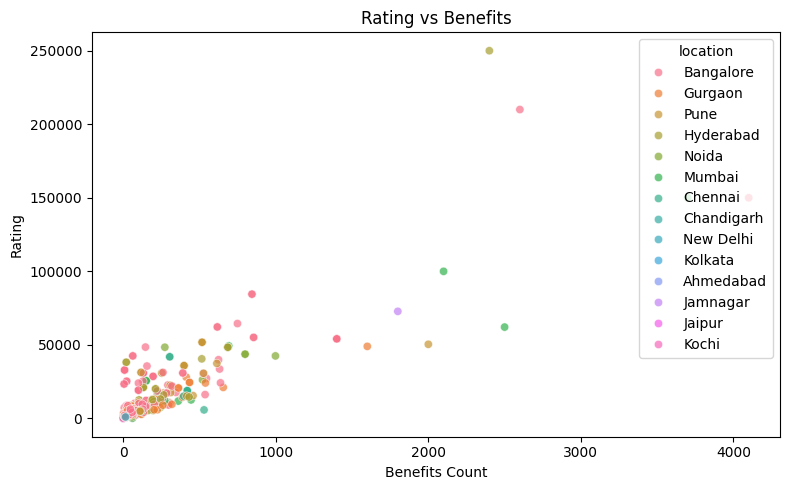

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(df,x="benefits",y="salary",hue="location",alpha=0.7)
plt.xlabel("Benefits Count")
plt.ylabel("Rating")
plt.title("Rating vs Benefits")
plt.tight_layout()
plt.show()

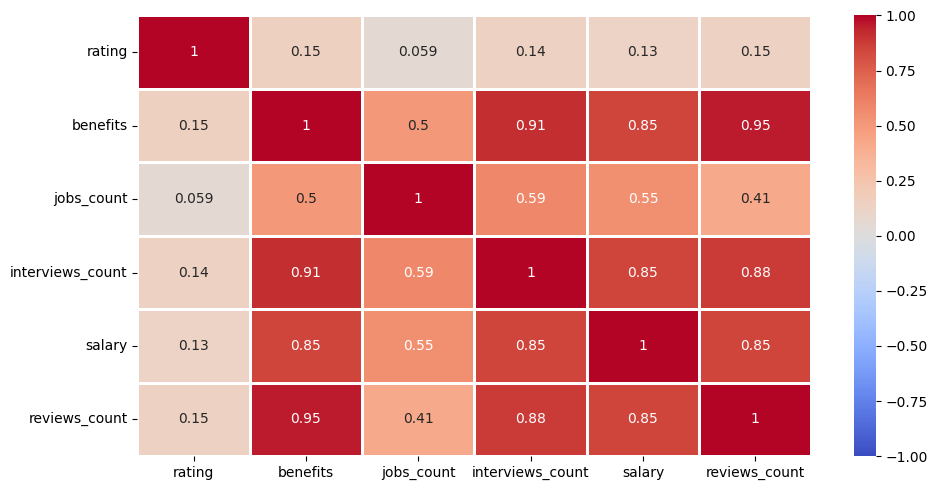

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),linewidths=2,linecolor='white',annot=True,cmap="coolwarm",vmin=-1,vmax=1,center=0)
plt.tight_layout()
plt.show()

In [20]:
jobs_company_rating = (df.groupby(["company_name","rating"])[["jobs_count"]].sum().sort_values(ascending=False,by="jobs_count").head(10))

In [21]:
jobs_company_rating

,,jobs_count
company_name,rating,
Amazon,3.9,2900
EXL Service,3.6,2800
Oracle,3.5,2200
Google,4.4,1788
JPMorgan Chase & Co.,3.8,1336
Deloitte,3.7,1100
Deutsche Bank,3.8,985
Amgen,2.8,981
Apple,4.3,852
